# Lab 4 - Convolutional neural network

In [5]:
import re
import random
import numpy as np
import pandas as pd

from tensorflow import keras

from skimage.io import imread, imshow

### Data import - Clothes Classification  

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

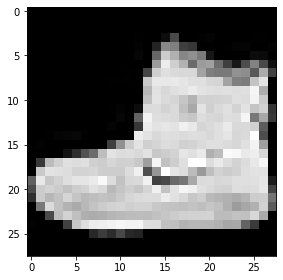

In [11]:
imshow(x_train[0])

### Model initialising

In [12]:
inputs = keras.Input(shape=(28, 28, 1))

x = keras.layers.Conv2D(64, 3, activation="relu")(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Flatten()(x)

outputs = keras.layers.Dense(10)(x)

cnn_model = keras.Model(inputs=inputs, outputs=outputs, name="cnn_model")
# cnn_model.summary()

In [13]:
cnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

### Training

In [14]:
cnn_model.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 25s 129ms/step - loss: 2.7095 - accuracy: 0.7576 - val_loss: 0.7663 - val_accuracy: 0.8337
Epoch 2/5
188/188 [==============================] - 23s 124ms/step - loss: 0.4819 - accuracy: 0.8893 - val_loss: 0.5159 - val_accuracy: 0.8792
Epoch 3/5
188/188 [==============================] - 24s 125ms/step - loss: 0.2770 - accuracy: 0.9210 - val_loss: 0.5463 - val_accuracy: 0.8783
Epoch 4/5
188/188 [==============================] - 24s 129ms/step - loss: 0.1956 - accuracy: 0.9409 - val_loss: 0.5880 - val_accuracy: 0.8860
Epoch 5/5
188/188 [==============================] - 23s 125ms/step - loss: 0.1454 - accuracy: 0.9533 - val_loss: 0.6532 - val_accuracy: 0.8863


### Eval

In [16]:
test_scores = cnn_model.evaluate(x_test, y_test, verbose=2)

print(f"Test accuracy: { test_scores[1]} | Test loss: {test_scores[0]}")

313/313 - 1s - loss: 0.6894 - accuracy: 0.8814
Test accuracy: 0.8813999891281128 | Test loss: 0.6894366145133972
